# Major Research Project- Regression(With indicator)

### Md Mozahidur Rahman - 501002626

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib import pyplot

from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,BaggingClassifier,ExtraTreesClassifier
import xgboost as xgb
from xgboost import XGBRegressor

### Data load

In [3]:
#Test.csv 
#df=pd.read_csv('Test.csv')
dataset=pd.read_csv('data_version2.csv',encoding= 'unicode_escape')
#dataset=pd.read_csv('Test.csv',encoding= 'unicode_escape')
dataset.head()

,Unnamed: 0,Unnamed: 0.1,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,...,Customer Full Name,order_year,order_month,order_week_day,order_hour,fraud,late_delivery,Population Customer Country,Unemployment Rate Customer Country,Gdp per Capita Customer Country
0,0,0,DEBIT,3,4,91.250000,73,Sporting Goods,Caguas,Puerto Rico,...,CallyHolloway,2018,1,2,22,0,0,3319269,9.2,31605
1,1,1,TRANSFER,5,4,-249.089996,73,Sporting Goods,Caguas,Puerto Rico,...,IreneLuna,2018,1,5,12,0,1,3319269,9.2,31605
2,2,4,PAYMENT,2,4,134.210007,73,Sporting Goods,Caguas,Puerto Rico,...,OrliHendricks,2018,1,5,11,0,0,3319269,9.2,31605
3,3,6,DEBIT,2,1,95.180000,73,Sporting Goods,Caguas,Puerto Rico,...,ConstanceTerrell,2018,1,5,10,0,1,3319269,9.2,31605
4,4,8,CASH,3,2,133.720001,73,Sporting Goods,Caguas,Puerto Rico,...,NicholeOlsen,2018,1,5,10,0,1,3319269,9.2,31605


In [4]:
dataset.dtypes

Unnamed: 0                              int64
Unnamed: 0.1                            int64
Type                                   object
Days for shipping (real)                int64
Days for shipment (scheduled)           int64
Benefit per order                     float64
Category Id                             int64
Category Name                          object
Customer City                          object
Customer Country                       object
Customer Id                             int64
Customer Segment                       object
Customer State                         object
Customer Zipcode                      float64
Department Id                           int64
Department Name                        object
Market                                 object
Order City                             object
Order Country                          object
Order Id                                int64
Order Item Discount                   float64
Order Item Discount Rate          

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 40 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Unnamed: 0                          180519 non-null  int64  
 1   Unnamed: 0.1                        180519 non-null  int64  
 2   Type                                180519 non-null  object 
 3   Days for shipping (real)            180519 non-null  int64  
 4   Days for shipment (scheduled)       180519 non-null  int64  
 5   Benefit per order                   180519 non-null  float64
 6   Category Id                         180519 non-null  int64  
 7   Category Name                       180519 non-null  object 
 8   Customer City                       180519 non-null  object 
 9   Customer Country                    180519 non-null  object 
 10  Customer Id                         180519 non-null  int64  
 11  Customer Segment          

In [6]:
df=dataset.copy()

In [7]:
#dataset.to_csv('clean_dataset_version1.csv')

In [8]:
# create the Labelencoder object
le = preprocessing.LabelEncoder()

In [9]:
#convert the categorical columns into numeric

df['Type']              = le.fit_transform(df['Type'])
df['Category Name']     = le.fit_transform(df['Category Name'])
df['Customer City']     = le.fit_transform(df['Customer City'])
df['Customer Country']  = le.fit_transform(df['Customer Country'])
df['Customer Segment']  = le.fit_transform(df['Customer Segment'])
df['Customer State']    = le.fit_transform(df['Customer State'])
df['Department Name']   = le.fit_transform(df['Department Name'])
df['Market']            = le.fit_transform(df['Market'])
df['Order City']        = le.fit_transform(df['Order City'])
df['Order Country']     = le.fit_transform(df['Order Country'])
df['Order Region']      = le.fit_transform(df['Order Region'])
df['Order State']       = le.fit_transform(df['Order State'])
df['Product Name']      = le.fit_transform(df['Product Name'])
df['Shipping Mode']     = le.fit_transform(df['Shipping Mode'])
df['Customer Full Name']= le.fit_transform(df['Customer Full Name'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 40 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Unnamed: 0                          180519 non-null  int64  
 1   Unnamed: 0.1                        180519 non-null  int64  
 2   Type                                180519 non-null  int32  
 3   Days for shipping (real)            180519 non-null  int64  
 4   Days for shipment (scheduled)       180519 non-null  int64  
 5   Benefit per order                   180519 non-null  float64
 6   Category Id                         180519 non-null  int64  
 7   Category Name                       180519 non-null  int32  
 8   Customer City                       180519 non-null  int32  
 9   Customer Country                    180519 non-null  int32  
 10  Customer Id                         180519 non-null  int64  
 11  Customer Segment          

In [11]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,...,Customer Full Name,order_year,order_month,order_week_day,order_hour,fraud,late_delivery,Population Customer Country,Unemployment Rate Customer Country,Gdp per Capita Customer Country
0,0,0,1,3,4,91.250000,73,40,66,1,...,1876,2018,1,2,22,0,0,3319269,9.2,31605
1,1,1,3,5,4,-249.089996,73,40,66,1,...,5378,2018,1,5,12,0,1,3319269,9.2,31605
2,2,4,2,2,4,134.210007,73,40,66,1,...,10638,2018,1,5,11,0,0,3319269,9.2,31605
3,3,6,1,2,1,95.180000,73,40,66,1,...,2723,2018,1,5,10,0,1,3319269,9.2,31605
4,4,8,0,3,2,133.720001,73,40,66,1,...,10353,2018,1,5,10,0,1,3319269,9.2,31605


In [12]:
df.apply(lambda x: sum(x.isnull())) #Checking missing values

Unnamed: 0                            0
Unnamed: 0.1                          0
Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Id                           0
Customer Segment                      0
Customer State                        0
Customer Zipcode                      0
Department Id                         0
Department Name                       0
Market                                0
Order City                            0
Order Country                         0
Order Id                              0
Order Item Discount                   0
Order Item Discount Rate              0
Order Item Profit Ratio               0
Order Item Quantity                   0
Sales                                 0


In [13]:
xs=df.loc[:, df.columns != 'Sales']
ys=df['Sales']
xs_train, xs_test,ys_train,ys_test = train_test_split(xs,ys,test_size = 0.3, random_state = 42)

In [14]:
scaler=MinMaxScaler()
xs_train=scaler.fit_transform(xs_train)
xs_test=scaler.transform(xs_test)

In [15]:
def regression_model(model_s,xs_train, xs_test,ys_train,ys_test):
    model_s=model_s.fit(xs_train,ys_train)#Fitting train data for sales    
    ys_pred=model_s.predict(xs_test)#predicting sales with test data    
    print('Model parameter used are:',model_s) #Printing the model to see which parameters are used    
    #Printing mean absolute error for predicting sales
    print("MAE of sales is         :", metrics.mean_absolute_error(ys_test,ys_pred))
    #Printing Root mean squared error for predicting sales
    print("RMSE of sales is        :",np.sqrt(metrics.mean_squared_error(ys_test,ys_pred)))
    return ys_pred

In [16]:
linear=LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
elasticNet = ElasticNet(alpha=.0001, l1_ratio=.0001, random_state=0)
dt = tree.DecisionTreeRegressor()
randomforest = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
xgbboost = xgb.XGBRegressor()

In [17]:
y_linear = regression_model(linear,xs_train, xs_test,ys_train,ys_test)
y_lasso = regression_model(lasso,xs_train, xs_test,ys_train,ys_test)
y_ridge = regression_model(ridge,xs_train, xs_test,ys_train,ys_test)
y_elastic = regression_model(elasticNet,xs_train, xs_test,ys_train,ys_test)

Model parameter used are: LinearRegression()
MAE of sales is         : 18.323203180719524
RMSE of sales is        : 30.455591542663964
Model parameter used are: Lasso(alpha=0.1)
MAE of sales is         : 17.510553633830582
RMSE of sales is        : 30.86774809368288
Model parameter used are: Ridge(alpha=0.1)
MAE of sales is         : 18.305990517376312
RMSE of sales is        : 30.474495577141955
Model parameter used are: ElasticNet(alpha=0.0001, l1_ratio=0.0001, random_state=0)
MAE of sales is         : 18.429842419421064
RMSE of sales is        : 30.885236295217435


In [18]:
y_dt = regression_model(dt,xs_train, xs_test,ys_train,ys_test)
y_rf = regression_model(randomforest,xs_train, xs_test,ys_train,ys_test)
y_xgboost = regression_model(xgbboost,xs_train, xs_test,ys_train,ys_test)

Model parameter used are: DecisionTreeRegressor()
MAE of sales is         : 1.2921490747908022e-11
RMSE of sales is        : 1.827639011633784e-11
Model parameter used are: RandomForestRegressor(max_depth=10, random_state=40)
MAE of sales is         : 0.014658881265402893
RMSE of sales is        : 0.16448469763240633
Model parameter used are: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
MAE of sales is         : 0.018399734294388174
RMSE of sales is        : 0.09638

Create a dataframe on results and read to csv file for future analysis in tableau

In [20]:
d = {"MODELS": ["Linear Regression","Lasso Regression","Ridge Regression", "ElasticNet Regression","Decision Tree Regressor","Random Forest Regressor", "Xgb Regressor"], "MAE": [18.32,17.51,18.30,18.42,1.29,0.014,0.018], "RMSE": [30.45,30.86,30.47,31.88,1.82,0.16,0.09]}
data_result_no_bias = pd.DataFrame(data=d)
data_result_no_bias.to_csv('data_result_with_bias.csv')

Important feature extraction on best model

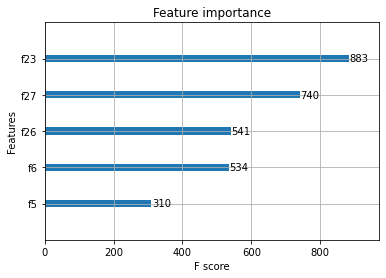

In [21]:
from xgboost import plot_importance
import matplotlib.pylab as plt
from matplotlib import pyplot
plot_importance(xgbboost, max_num_features=5) # top 10 most important features
plt.show()

### Here f23 means feature number 22
#### f23 - Order Item Profit Ratio 
#### f27 - Order State
#### f26 - Order Region
#### f6 - Benefit per order
#### f5 -  Days for shipment (scheduled)